In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link = 'https://drive.google.com/file/d/1TGHekDPdbJQjF8iLP5J58T0clqz2rrjL/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+ link.split("/")[-2]
df = pd.read_csv(path)
df.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,difficulty,learning_stage,cheating
0,2019-05-01 06:45:00+00:00,dJk8f4bqY/iRA7oVNzBYM8vtOm8XvgPxcoYy+mOwTuY=,tcefpcahExZLA6gms/r4H1DHPHzmBUwg8h7hfNlV4sc=,4pDOyeqUIPE/UY/LZjK2y/MsUUB5/+BsQcTsj8BMzFQ=,3,1,True,8,1,0,False,275719,10,0,easy,elementary,0
1,2019-05-01 07:30:00+00:00,yMtJ95VxxbuqWsxV5OicL3TYo86oC0Rn9iKy8cUm90s=,3cg9wquB/Sf1whKNOekAQ/XUQcTUeXeW01l06R+BbNE=,S0j1Ry8rhnymKIp/9fiiMiQVvu1J8a9VI/yKtwclACo=,8,1,True,8,1,0,False,60837,10,0,easy,elementary,0
2,2019-05-01 07:45:00+00:00,r4xa2pAreiDQeNzIJYkk/8IOzKJGvKqBguTqsIsKauU=,ViIxd7sl/Dp2C0nC24swu3Cm5o8UkaEMgyMuUp7pq0g=,t7MThCasM6oaABNzFzljWWlWNmHSFHauc4tCFAY+eAU=,8,2,True,46,1,0,False,582498,97,0,easy,elementary,0
3,2019-05-01 08:15:00+00:00,ESTiGJ4iybOV7T+zrZw+AgE0g8UNj7ZTbdpnMCd2R2U=,00KEZbwE/6qJ+WSl9TwUEgbwi/wmnEVgeCnGzi4/EYo=,zbLAOaiLjHZDCBc6rPbuDqwsvUSeFxk9ofM4KBwwQes=,5,1,True,33,1,0,False,21300,1,0,normal,elementary,0
4,2019-05-01 08:15:00+00:00,fo0e8Za+Io+VdNu3Hy4GE2Ux1mTh76k2igiZtrThMCo=,00KEZbwE/6qJ+WSl9TwUEgbwi/wmnEVgeCnGzi4/EYo=,ged8VYe3DG5I55+Vkw+lP2LatMfGOor3nA6LILELx4E=,5,1,True,115,1,0,False,13125,1,0,normal,elementary,0


In [ ]:
df = df.drop(columns = ['uuid', 'ucid', 'upid'])

In [ ]:
difficulty_encoded = pd.get_dummies(df['difficulty'], prefix='difficulty')
df = pd.concat([df, difficulty_encoded], axis=1)
df = df.drop('difficulty', axis=1)

learning_stage_encoded = pd.get_dummies(df['learning_stage'], prefix='learning_stage')
df = pd.concat([df, learning_stage_encoded], axis=1)
df = df.drop('learning_stage', axis=1)

In [ ]:
df['is_correct'] = df['is_correct'].astype(int)
df['is_hint_used'] = df['is_hint_used'].astype(int)

In [ ]:
df['timestamp_TW'] = pd.to_datetime(df['timestamp_TW'])

df['hour'] = df['timestamp_TW'].dt.hour
df['minute'] = df['timestamp_TW'].dt.minute
df['weekday'] = df['timestamp_TW'].dt.weekday
df['day'] = df['timestamp_TW'].dt.day
df['month'] = df['timestamp_TW'].dt.month

In [ ]:
df =df.drop(columns = 'timestamp_TW')

In [ ]:
df.head()

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,difficulty_hard,difficulty_normal,learning_stage_elementary,learning_stage_junior,learning_stage_senior,hour,minute,weekday,day,month
0,3,1,1,8,1,0,0,275719,10,0,...,False,False,True,False,False,6,45,2,1,5
1,8,1,1,8,1,0,0,60837,10,0,...,False,False,True,False,False,7,30,2,1,5
2,8,2,1,46,1,0,0,582498,97,0,...,False,False,True,False,False,7,45,2,1,5
3,5,1,1,33,1,0,0,21300,1,0,...,False,True,True,False,False,8,15,2,1,5
4,5,1,1,115,1,0,0,13125,1,0,...,False,True,True,False,False,8,15,2,1,5


In [ ]:
X = df.drop(columns = "cheating")
y = df["cheating"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 43)

print(X_train.shape, X_test.shape)

(10029, 21) (2508, 21)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
model_over_sampl = RandomOverSampler(random_state=42)
X_over, y_over = model_over_sampl.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_over.value_counts())

cheating
0    9227
1     802
Name: count, dtype: int64
cheating
0    9227
1    9227
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5], y_train.head()

(array([[-0.29789332, -0.19103231,  0.55970083, -0.09363967, -0.21742235,
         -0.36943913, -0.44226059, -0.69645264, -0.61268055, -0.04939384,
          0.99190445, -0.42737042, -0.72013732,  0.75190261, -0.7494321 ,
         -0.03898194, -0.96859336,  1.25531728,  0.2824891 ,  1.40858232,
         -1.01595032],
        [-0.15401221, -0.19103231, -1.78666879,  0.15626111,  4.47503544,
          2.08795475,  2.26111036,  0.05964908,  0.92552193, -0.04939384,
         -1.00816162,  2.33989054, -0.72013732,  0.75190261, -0.7494321 ,
         -0.03898194,  1.31351964, -0.53015616, -1.23927421, -0.12744643,
          0.9843001 ],
        [ 0.04742136, -0.19103231, -1.78666879,  0.03131072,  0.56465395,
          1.26882345,  2.26111036, -0.58008236, -0.26156911, -0.04939384,
          0.99190445, -0.42737042, -0.72013732, -1.32995947,  1.3343437 ,
         -0.03898194,  0.17246314, -0.53015616, -0.73201977, -0.83638277,
          0.9843001 ],
        [ 0.99703673,  0.27694994,  0.55970

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2294
           1       0.28      0.74      0.41       214

    accuracy                           0.82      2508
   macro avg       0.63      0.78      0.65      2508
weighted avg       0.91      0.82      0.85      2508



<Axes: >

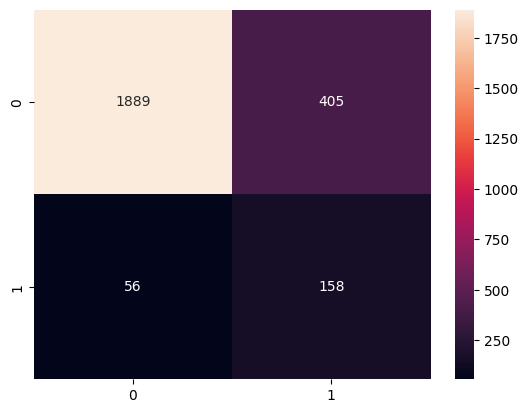

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier()
# Create Grid Search with param_grid
param_grid = {
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [150, 180, 190, 250],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_search = GridSearchCV(estimator=model_adaboost, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_scaled, y_over)
model_adaboost = grid_search.best_estimator_
y_proba = model_adaboost.predict_proba(X_test_scaled)
y_scores = y_proba[:, 1]
threshold = 0.5
y_pred_threshold = (y_scores >= threshold).astype(int)

print(classification_report(y_test, y_pred_threshold))

cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = "g")

In [ ]:
test_results = X_test.copy()
test_results["Predicted_Label"] = y_pred_threshold
test_results["Predicted_Probability_Cheat"] = y_scores

# Show only rows with Predicted_Label = 1
cheating_cases_adaboost = test_results[test_results["Predicted_Label"] == 1]

cheating_cases_adaboost

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,learning_stage_elementary,learning_stage_junior,learning_stage_senior,hour,minute,weekday,day,month,Predicted_Label,Predicted_Probability_Cheat
7815,16,1,0,9,4,1,1,80647,29,0,...,False,True,False,16,45,1,4,6,1,0.550280
1748,8,2,1,5,1,0,0,39379,19,0,...,False,True,False,0,45,6,12,5,1,0.657298
10883,2,2,0,0,0,1,1,125805,30,0,...,True,False,False,11,45,0,10,6,1,0.619125
2433,4,1,1,25,1,0,0,3150,0,0,...,True,False,False,9,30,3,16,5,1,0.528825
8084,48,3,1,6,1,0,0,42110,6,0,...,True,False,False,21,15,1,4,6,1,0.539286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,3,1,1,8,1,0,0,372299,12,0,...,True,False,False,20,15,2,1,5,1,0.539286
3058,18,1,1,11,1,0,0,255027,33,0,...,False,True,False,16,15,0,20,5,1,0.531238
5001,10,1,1,14,1,0,0,584190,254,0,...,False,True,False,15,15,4,31,5,1,0.531238
3749,3,1,1,14,1,0,0,355849,58,0,...,True,False,False,8,30,4,24,5,1,0.539286


              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2294
           1       0.25      0.70      0.37       214

    accuracy                           0.80      2508
   macro avg       0.61      0.75      0.63      2508
weighted avg       0.91      0.80      0.84      2508



<Axes: >

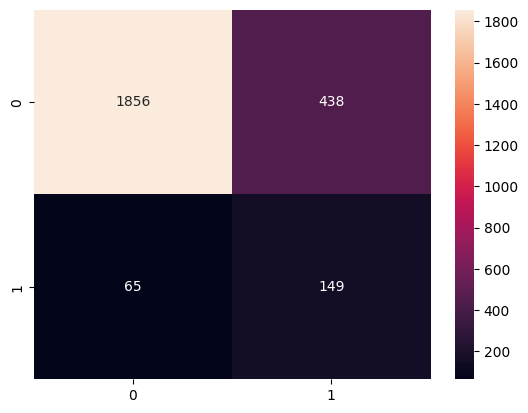

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Khởi tạo LinearSVC
svc = LinearSVC(dual=False, max_iter=10000)

# Dùng CalibratedClassifierCV để có thể dùng predict_proba
svc_calibrated = CalibratedClassifierCV(svc, method='sigmoid', cv=5)

# Tập tham số cần tuning
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__class_weight': [None, 'balanced']
}

# Dùng GridSearchCV để tìm tham số tối ưu
grid_search = GridSearchCV(estimator=svc_calibrated,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)


grid_search.fit(X_train_scaled, y_over)
best_model = grid_search.best_estimator_
y_proba_lSVC = best_model.predict_proba(X_test_scaled)
y_scores_lSVC = y_proba_lSVC[:, 1]
threshold_lSVC = 0.5
y_pred_threshold_lSVC = (y_scores_lSVC >= threshold_lSVC).astype(int)

print(classification_report(y_test, y_pred_threshold_lSVC))
cm = confusion_matrix(y_test, y_pred_threshold_lSVC)
sns.heatmap(cm, annot = True, fmt = "g")

In [ ]:
test_results = X_test.copy()
test_results["Predicted_Label"] = y_pred_threshold_lSVC
test_results["Predicted_Probability_Cheat"] = y_scores_lSVC

# Show only rows with Predicted_Label = 1
cheating_cases_linearSVC = test_results[test_results["Predicted_Label"] == 1]

cheating_cases_linearSVC

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,learning_stage_elementary,learning_stage_junior,learning_stage_senior,hour,minute,weekday,day,month,Predicted_Label,Predicted_Probability_Cheat
8755,16,2,0,21,7,4,1,219276,70,0,...,True,False,False,22,45,2,5,6,1,0.618862
1748,8,2,1,5,1,0,0,39379,19,0,...,False,True,False,0,45,6,12,5,1,0.960228
2433,4,1,1,25,1,0,0,3150,0,0,...,True,False,False,9,30,3,16,5,1,0.781718
8165,1,1,0,34,3,0,0,206332,37,0,...,False,True,False,23,30,1,4,6,1,0.511193
4332,4,1,1,13,1,0,0,202296,26,0,...,False,True,False,11,15,1,28,5,1,0.724725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5041,14,1,1,71,1,0,0,132940,17,0,...,True,False,False,17,30,4,31,5,1,0.759429
3058,18,1,1,11,1,0,0,255027,33,0,...,False,True,False,16,15,0,20,5,1,0.703182
5001,10,1,1,14,1,0,0,584190,254,0,...,False,True,False,15,15,4,31,5,1,0.680778
3749,3,1,1,14,1,0,0,355849,58,0,...,True,False,False,8,30,4,24,5,1,0.519347
